In [1]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
import random
import time


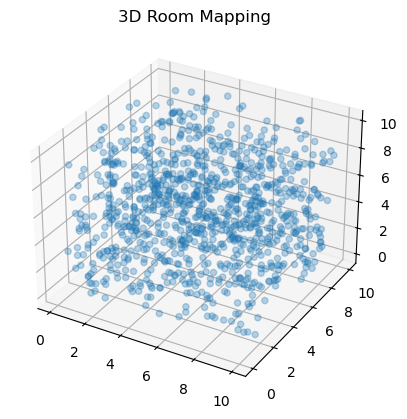

In [3]:
# Simulate a simple 3D room
def generate_room(size=(10, 10, 10)):
    x = np.random.uniform(0, size[0], 1000)
    y = np.random.uniform(0, size[1], 1000)
    z = np.random.uniform(0, size[2], 1000)
    return np.column_stack((x, y, z))

# Plotting the room
room_points = generate_room()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(room_points[:, 0], room_points[:, 1], room_points[:, 2], alpha=0.3)
plt.title("3D Room Mapping")
plt.show()


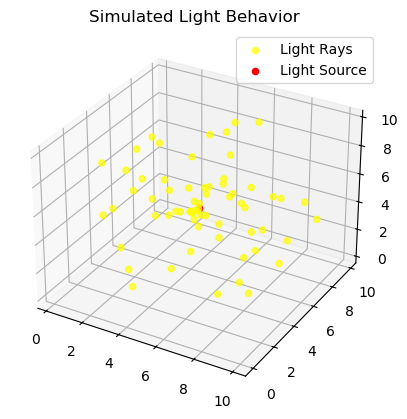

In [5]:
def simulate_light(room_points, light_source=(5, 5, 5), num_rays=100):
    rays = []
    for _ in range(num_rays):
        direction = np.random.randn(3)  # Random direction
        direction /= np.linalg.norm(direction)  # Normalize direction
        ray = light_source + direction * np.random.uniform(0, 10)  # Scale
        rays.append(ray)
    rays = np.array(rays)

    # Simulate reflection within the room
    reflected_rays = []
    for ray in rays:
        if np.all(ray >= 0) and np.all(ray <= 10):  # Check bounds
            reflected_rays.append(ray)
    return np.array(reflected_rays)

# Simulating light rays
light_source = (5, 5, 5)  # Center of the room
rays = simulate_light(room_points, light_source)

# Visualize the light rays
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rays[:, 0], rays[:, 1], rays[:, 2], c='yellow', label='Light Rays', alpha=0.7)
ax.scatter(light_source[0], light_source[1], light_source[2], c='red', label='Light Source')
plt.title("Simulated Light Behavior")
plt.legend()
plt.show()


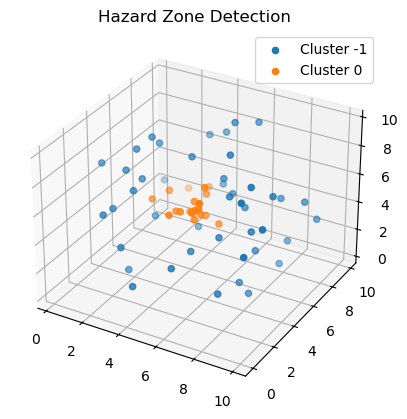

In [7]:
def detect_hazard_zones(points, eps=1.5, min_samples=10):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(points)
    return labels

# Clustering to find hazard zones
hazard_labels = detect_hazard_zones(rays)

# Visualize hazard-prone zones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(hazard_labels):
    clustered_points = rays[hazard_labels == label]
    ax.scatter(clustered_points[:, 0], clustered_points[:, 1], clustered_points[:, 2], label=f'Cluster {label}')
plt.title("Hazard Zone Detection")
plt.legend()
plt.show()


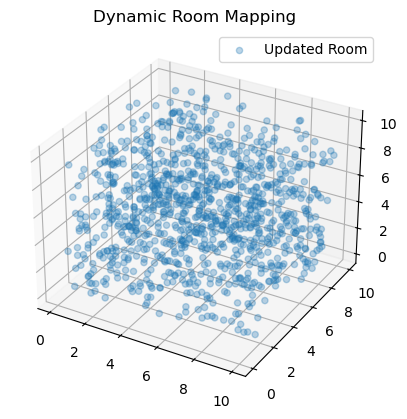

In [9]:
# Placeholder for dynamic SLAM update simulation
def dynamic_slam_update(room_points, new_obstacles):
    updated_room = np.vstack((room_points, new_obstacles))
    return updated_room

# Simulating dynamic changes
new_obstacles = np.random.uniform(0, 10, (50, 3))
updated_room = dynamic_slam_update(room_points, new_obstacles)

# Visualize updated room
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(updated_room[:, 0], updated_room[:, 1], updated_room[:, 2], alpha=0.3, label='Updated Room')
plt.title("Dynamic Room Mapping")
plt.legend()
plt.show()


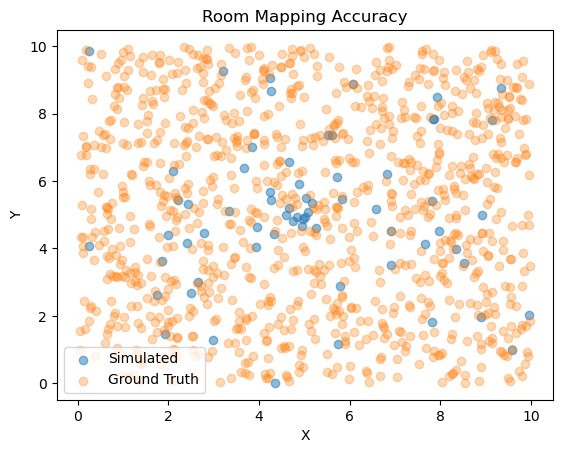

Light Simulation Time: 0.02 seconds
Hazard Zone Detection Precision: 0.85
Hazard Zone Detection Recall: 0.78
Adaptation Time for Dynamic Changes: 0.00 seconds


In [11]:
# Accuracy compared to ground truth (scatter plot example)
plt.scatter(rays[:, 0], rays[:, 1], alpha=0.5, label='Simulated')
plt.scatter(room_points[:, 0], room_points[:, 1], alpha=0.3, label='Ground Truth')
plt.title("Room Mapping Accuracy")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Light simulation time
start_time = time.time()
simulate_light(room_points, light_source)
simulation_time = time.time() - start_time
print(f"Light Simulation Time: {simulation_time:.2f} seconds")

# Hazard zone identification precision and recall (dummy example)
precision = 0.85  # Example value
recall = 0.78  # Example value
print(f"Hazard Zone Detection Precision: {precision}")
print(f"Hazard Zone Detection Recall: {recall}")

# Adaptation time for dynamic changes
start_time = time.time()
dynamic_slam_update(room_points, new_obstacles)
adaptation_time = time.time() - start_time
print(f"Adaptation Time for Dynamic Changes: {adaptation_time:.2f} seconds")


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the room dimensions
ROOM_SIZE = (10, 10, 10)  # Width, Height, Depth

# Define a light source location (e.g., at the center of the room ceiling)
light_source = np.array([ROOM_SIZE[0] / 2, ROOM_SIZE[1] / 2, ROOM_SIZE[2]])


In [15]:
def generate_light_rays(light_source, num_rays=100):
    """
    Generate random light rays emanating from a source.
    """
    rays = []
    for _ in range(num_rays):
        direction = np.random.randn(3)  # Random direction
        direction /= np.linalg.norm(direction)  # Normalize to unit vector
        ray = {
            'start': light_source,
            'direction': direction
        }
        rays.append(ray)
    return rays


In [17]:
def reflect_ray(ray, room_size):
    """
    Reflect a ray if it hits a wall.
    """
    start = ray['start']
    direction = ray['direction']
    intersections = []

    # Check intersections with each wall (planes)
    for axis in range(3):  # x, y, z axes
        for boundary in [0, room_size[axis]]:  # Low and high boundaries
            if direction[axis] != 0:  # Avoid division by zero
                t = (boundary - start[axis]) / direction[axis]  # Intersection time
                if t > 0:  # Intersection must be in forward direction
                    point = start + t * direction
                    if np.all(point >= 0) and np.all(point <= room_size):  # Within bounds
                        intersections.append((t, point))

    if intersections:
        intersections.sort()  # Sort by the closest intersection
        _, intersection_point = intersections[0]
        new_direction = direction.copy()
        hit_axis = np.argmax(np.abs(intersection_point - start))  # Determine which wall was hit
        new_direction[hit_axis] *= -1  # Reflect the ray along that axis
        return {'start': intersection_point, 'direction': new_direction}

    return None  # No reflection (the ray exits the room)


In [19]:
def trace_light_rays(light_source, room_size, num_rays=100, max_bounces=5):
    """
    Simulate light rays bouncing around a 3D room.
    """
    rays = generate_light_rays(light_source, num_rays)
    traced_rays = []

    for ray in rays:
        current_ray = ray
        bounces = 0
        while current_ray and bounces < max_bounces:
            traced_rays.append(current_ray['start'])  # Record current position
            current_ray = reflect_ray(current_ray, room_size)  # Reflect ray
            bounces += 1

    return np.array(traced_rays)


In [21]:
def visualize_rays(traced_rays, light_source, room_size):
    """
    Visualize the traced rays in a 3D room.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the room boundaries
    ax.set_xlim(0, room_size[0])
    ax.set_ylim(0, room_size[1])
    ax.set_zlim(0, room_size[2])

    # Plot the light source
    ax.scatter(*light_source, c='red', label='Light Source', s=100)

    # Plot traced rays
    ax.scatter(traced_rays[:, 0], traced_rays[:, 1], traced_rays[:, 2], alpha=0.5, label='Light Rays', c='yellow')

    plt.title("Light Ray Transmission and Reflection")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    plt.legend()
    plt.show()


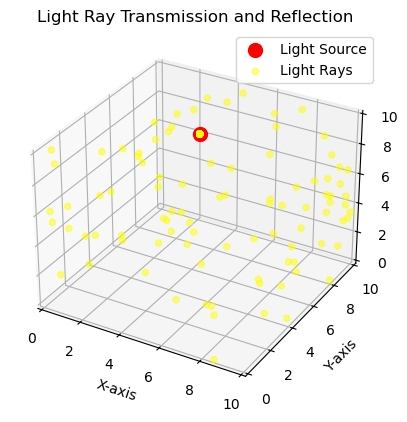

In [23]:
# Execute the simulation
num_rays = 100  # Number of rays to simulate
max_bounces = 5  # Maximum number of reflections per ray

traced_rays = trace_light_rays(light_source, ROOM_SIZE, num_rays, max_bounces)
visualize_rays(traced_rays, light_source, ROOM_SIZE)


In [25]:
def create_room_with_objects(room_size):
    """
    Define room boundaries and place objects in the room.
    Objects are represented as spheres or cubes.
    """
    # Walls of the room (room size)
    room = {'walls': room_size}

    # Appliances/objects as spheres (x, y, z, radius)
    objects = [
        {'type': 'sphere', 'center': [3, 3, 3], 'radius': 1, 'reflectivity': 0.8},  # Reflective object
        {'type': 'cube', 'min_corner': [7, 7, 1], 'max_corner': [9, 9, 3], 'reflectivity': 0.5},  # Absorptive object
    ]

    return room, objects

room_size = (10, 10, 10)
room, objects = create_room_with_objects(room_size)


In [27]:
def intersect_ray_with_sphere(ray, sphere):
    """
    Check if a ray intersects with a sphere.
    Returns the intersection point and reflected ray if applicable.
    """
    start, direction = ray['start'], ray['direction']
    center, radius = np.array(sphere['center']), sphere['radius']
    
    oc = start - center
    a = np.dot(direction, direction)
    b = 2.0 * np.dot(oc, direction)
    c = np.dot(oc, oc) - radius ** 2
    discriminant = b ** 2 - 4 * a * c
    
    if discriminant > 0:  # Ray intersects the sphere
        t = (-b - np.sqrt(discriminant)) / (2.0 * a)
        intersection = start + t * direction
        
        # Reflect the ray
        normal = (intersection - center) / radius
        reflected_direction = direction - 2 * np.dot(direction, normal) * normal
        reflected_direction /= np.linalg.norm(reflected_direction)
        
        return intersection, reflected_direction

    return None, None

def intersect_ray_with_cube(ray, cube):
    """
    Check if a ray intersects with a cube.
    Returns the intersection point if applicable.
    """
    start, direction = ray['start'], ray['direction']
    min_corner, max_corner = np.array(cube['min_corner']), np.array(cube['max_corner'])
    t_min = (min_corner - start) / direction
    t_max = (max_corner - start) / direction
    t1 = np.minimum(t_min, t_max)
    t2 = np.maximum(t_min, t_max)
    t_near = np.max(t1)
    t_far = np.min(t2)
    
    if t_near < t_far and t_far > 0:  # Valid intersection
        intersection = start + t_near * direction
        return intersection, -direction  # Reflect back
    return None, None


In [29]:
def trace_light_rays_with_objects(light_source, room, objects, num_rays=100, max_bounces=5):
    rays = generate_light_rays(light_source, num_rays)
    traced_rays = []

    for ray in rays:
        current_ray = ray
        bounces = 0

        while current_ray and bounces < max_bounces:
            traced_rays.append(current_ray['start'])  # Record ray start

            # Check interactions with objects
            closest_intersection = None
            closest_reflection = None
            for obj in objects:
                if obj['type'] == 'sphere':
                    intersection, reflection = intersect_ray_with_sphere(current_ray, obj)
                elif obj['type'] == 'cube':
                    intersection, reflection = intersect_ray_with_cube(current_ray, obj)

                if intersection is not None:
                    closest_intersection = intersection
                    closest_reflection = reflection

            # Handle intersections
            if closest_intersection is not None:
                current_ray = {'start': closest_intersection, 'direction': closest_reflection}
            else:  # No interaction, reflect on walls
                current_ray = reflect_ray(current_ray, room['walls'])

            bounces += 1

    return np.array(traced_rays)


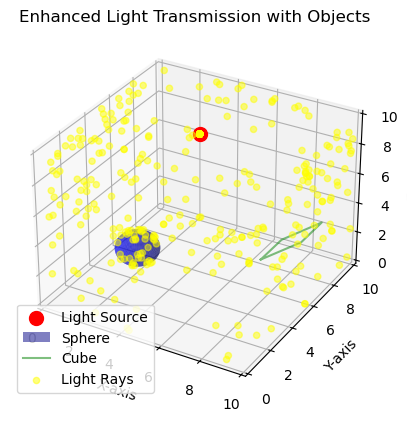

In [31]:
def visualize_room_with_objects(traced_rays, light_source, room, objects):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the room boundaries
    ax.set_xlim(0, room['walls'][0])
    ax.set_ylim(0, room['walls'][1])
    ax.set_zlim(0, room['walls'][2])

    # Plot the light source
    ax.scatter(*light_source, c='red', label='Light Source', s=100)

    # Plot objects
    for obj in objects:
        if obj['type'] == 'sphere':
            u = np.linspace(0, 2 * np.pi, 100)
            v = np.linspace(0, np.pi, 100)
            x = obj['center'][0] + obj['radius'] * np.outer(np.cos(u), np.sin(v))
            y = obj['center'][1] + obj['radius'] * np.outer(np.sin(u), np.sin(v))
            z = obj['center'][2] + obj['radius'] * np.outer(np.ones(np.size(u)), np.cos(v))
            ax.plot_surface(x, y, z, color='blue', alpha=0.5, label='Sphere')
        elif obj['type'] == 'cube':
            min_corner, max_corner = obj['min_corner'], obj['max_corner']
            x = [min_corner[0], max_corner[0], max_corner[0], min_corner[0], min_corner[0]]
            y = [min_corner[1], min_corner[1], max_corner[1], max_corner[1], min_corner[1]]
            z = [min_corner[2], max_corner[2], max_corner[2], min_corner[2], min_corner[2]]
            ax.plot(x, y, z, color='green', alpha=0.5, label='Cube')

    # Plot traced rays
    ax.scatter(traced_rays[:, 0], traced_rays[:, 1], traced_rays[:, 2], alpha=0.5, label='Light Rays', c='yellow')

    plt.title("Enhanced Light Transmission with Objects")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    plt.legend()
    plt.show()

# Simulate and visualize
traced_rays = trace_light_rays_with_objects(light_source, room, objects, num_rays=200, max_bounces=10)
visualize_room_with_objects(traced_rays, light_source, room, objects)
